In [1]:
### Import datasets and create dataloaders
from RotFashionMNIST import RotFashionMNIST

In [2]:
import torchvision

dataset_rot = RotFashionMNIST(
    root = 'data',
    download=True,
    train=True,
    transform=torchvision.transforms.Compose(
        [torchvision.transforms.Resize(32), torchvision.transforms.ToTensor()]
    ),
    rotation_mirroring=True
)

test_dataset_rot = RotFashionMNIST(
    root = 'data',
    download=True,
    train=False,
    transform=torchvision.transforms.Compose(
        [torchvision.transforms.Resize(32), torchvision.transforms.ToTensor()]
    ),
    rotation_mirroring=True
)

dataset_upright = RotFashionMNIST(
    root = 'data',
    download=True,
    train=True,
    transform=torchvision.transforms.Compose(
        [torchvision.transforms.Resize(32), torchvision.transforms.ToTensor()]
    ),
    rotation_mirroring=False,
)



C:\Users\Jack\anaconda3\envs\reu-code\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


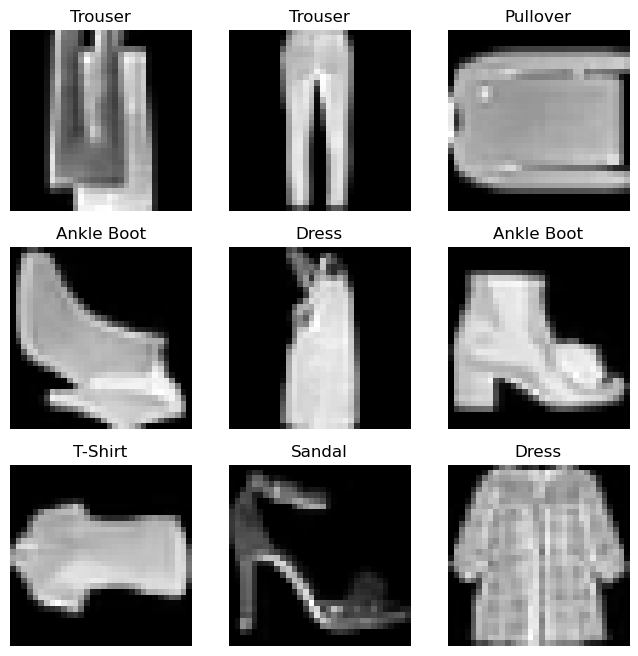

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

dataset = dataset_rot

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Testing out transformations on dataset
This section was inspired by 'data augmentation' a technique employed in order to take a dataset and expand it by applying appropriate flips/mirrors and/or rototations
An input of 50,000 images of objects in the group m (mirrored) will essentially be augmented to a input of 100,000 images and half with mirrored.
This increases the size of the dataset without the need of collecting more data.

### This next section
Contains transforms that hopefully will reproduce the desired rotations and mirrorings that I am doing by means of extending the dataset class (as with MNIST and FashionMNIST)

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
### Building own transform to mimic the Rotated datasets
import torchvision.transforms.functional as TF
import random

class RotationP4:
    """Rotate randomly in p4 group"""

    def __init__(self):
        self.angles = [-90, 0, 90, 180]
        
    def __call__(self, x):
        angle = random.choice(self.angles)
        return TF.rotate(x, angle)

In [6]:
transform_train = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_test = transforms.Compose(
    [transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    RotationP4(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [7]:
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Before


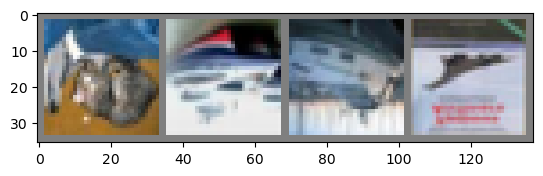

  cat  ship  ship plane


In [8]:
import matplotlib.pyplot as plt
import numpy as np

print('Before')

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))